In [ ]:
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from torch.autograd import Variable
import matplotlib
import matplotlib.pyplot as plt
import csv
import os
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import datasets, transforms

In [ ]:
f = open('/content/drive/MyDrive/졸업논문/data/강아지/labels.csv', encoding= 'utf-8')
reader = csv.reader(f)
rows = list(reader)[1:]
breed = {}
breed_label = {}
cnt = 0
for line in rows:
    breed[line[0]] = line[1]
    if line[1] not in breed_label:
        breed_label[line[1]] = cnt
        cnt = cnt + 1 
f.close()

In [ ]:
!mkdir 'dogs_train'
!mkdir 'dogs_test'

In [ ]:
dir_path = "/content/dogs_train"
for i in range(cnt):
    os.mkdir(dir_path + "/" + str(format(i, '03')) + "/")

In [ ]:
!unzip /content/drive/MyDrive/졸업논문/data/강아지/dogs_train.zip -d /content/dogs_train/
!unzip /content/drive/MyDrive/졸업논문/data/test_case/dogs_test.zip -d /content/dogs_test/

In [ ]:
file_list = os.listdir('/content/dogs_train')

for file in file_list:
    if file.endswith('.jpg'):
        a, _ = file.split('.')
        a = breed[a]
        a = breed_label[a]
        a = str(format(a, '03'))
        shutil.move('/content/dogs_train/' + file, '/content/dogs_train/' + a)

In [ ]:
'''trans = transforms.Compose([transforms.Resize((128, 128)),
                            transforms.ToTensor()
                            ])
trainset = torchvision.datasets.ImageFolder(root = "/content/dogs_train",
                                            transform = trans)'''

In [ ]:
'''trainloader = DataLoader(trainset,
                         batch_size = 16,
                         shuffle = False,
                         num_workers = 4)'''

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
'''dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)'''

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
'''def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1,2,0)))

    print(np._img.shape)
    print((np.tramspose(np_img, (1,2,0))).shape)'''

torch.Size([16, 3, 28, 28])


AttributeError: ignored

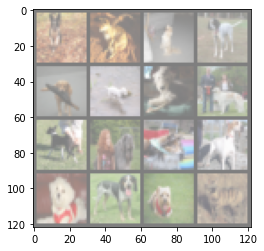

In [ ]:
'''print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))'''

In [ ]:
from torch import nn

class ConvNet(nn.Module):
    def __init__(self, num_classes=cnt):
        super(ConvNet, self).__init__()

        def conv_bn(inp, oup, stride):
            return nn.Sequential(
                nn.Conv2d(inp, oup, 3, stride, 1, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True)
            )

        def conv_dw(inp, oup, stride):
            return nn.Sequential(
                nn.Conv2d(inp, inp, 3, stride, 1, groups=inp, bias=False),
                nn.BatchNorm2d(inp),
                nn.ReLU(inplace=True),
    
                nn.Conv2d(inp, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True),
            )
        self.num_classes = num_classes
        self.model = nn.Sequential(
            conv_bn(  3,  16, 2), 
            conv_dw( 16,  32, 1),
            conv_dw( 32, 64, 2),
            conv_dw(64, 64, 1),
            conv_dw(64, 128, 2),
            conv_dw(128, 128, 1)
        )
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, self.num_classes)

    def forward(self, x):
        x = self.model(x)
        x = self.gap(x)
        x = x.view(-1, 128)
        x = self.fc(x)
        return x

In [ ]:
class net(torch.nn.Module):
    def __init__(self, base_model, base_out_features, num_classes):
        super(net,self).__init__()
        self.base_model=base_model
        self.linear1 = torch.nn.Linear(base_out_features, 512)
        self.output = torch.nn.Linear(512,num_classes)
    def forward(self,x):
        x = F.relu(self.base_model(x))
        x = F.relu(self.linear1(x))
        x = self.output(x)
        return x

res = torchvision.models.resnet50(pretrained=True)
for param in res.parameters():
    param.requires_grad=False

model_final = net(base_model=res, base_out_features=res.fc.out_features, num_classes=120)
model_final = model_final.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
import torch

#hyp parameters
dataset_path = "/content/dogs_train"
model_weight_save_path = "/content/drive/MyDrive/model/"
num_classes = cnt

batch_size = 64
num_workers = 8
lr = 1e-3

total_epoch = 30

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch import nn
from torchvision import transforms
import torchvision.datasets as datasets
import torchvision.models as models
import os


traindir = "/content/dogs_train"
testdir = "/content/dogs_test"


train_dataset = datasets.ImageFolder(
    traindir,
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]))


'''train_dataset = datasets.ImageNet(
    traindir,
    transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]))'''

'''train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=False,
    num_workers=num_workers, pin_memory=True, drop_last=False)'''

'''test_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(testdir, transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])),
    batch_size=batch_size, shuffle=False,
    num_workers=num_workers, pin_memory=True)'''

'test_loader = torch.utils.data.DataLoader(\n    datasets.ImageFolder(testdir, transforms.Compose([\n        transforms.Resize(256),\n        transforms.CenterCrop(224),\n        transforms.ToTensor(),\n    ])),\n    batch_size=batch_size, shuffle=False,\n    num_workers=num_workers, pin_memory=True)'

In [ ]:
from torch.utils.data import DataLoader, SubsetRandomSampler
total_size = len(train_dataset)
validation_rate = 0.1
batch_size = 64

# Divide train_dataset into train and validation set
indices = list(range(total_size))
np.random.shuffle(indices)
split = int(np.floor((1-validation_rate) * total_size))
train_idx, validation_idx = indices[:split], indices[split:]
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

# Dataloader with train and validation sampler
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           sampler=train_sampler,)
validation_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                batch_size=batch_size,
                                                sampler=validation_sampler,)
# There is no test sampler, so shuffle the test_dataset 
'''test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,)'''

'test_loader = torch.utils.data.DataLoader(dataset=test_dataset,\n                                          batch_size=batch_size,)'

In [ ]:
model = model_final

In [ ]:
import numpy as np

total_iteration_per_epoch = int(np.ceil(len(train_dataset)/batch_size))
CEloss = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,patience=3, factor=0.9, verbose=True)

for epoch in range(1, total_epoch + 1):
    model.train()
    for itereation, (input, target) in enumerate(train_loader):
        images = input.to(device)
        labels = target.to(device)

        outputs = model_final(images)
        loss = CEloss(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print('Epoch [{}/{}], Iteration [{}/{}] Loss: {:.4f}'.format(epoch, total_epoch, itereation+1, total_iteration_per_epoch, loss.item()))
    if epoch % 10 == 0:
      torch.save(model.state_dict(), model_weight_save_path + 'model_' + str(epoch) + ".pth")
    
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for input, target in validation_loader:
            images = input.to(device)
            labels = target.to(device)

            outputs = model_final(images)
            #_, predicted = torch.max(outputs.data, 1)
            _,predicted = outputs.max(dim=1)
            total += len(labels)
            correct += (predicted == labels).sum().item()

        print('Epoch [{}/{}], Test Accuracy of the model on the {} test images: {} %'.format(epoch, total_epoch, total, 100 * correct / total))

RuntimeError: ignored

In [ ]:
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,patience=3, factor=0.9, verbose=True)

nb_epochs = 100
cnt=nb_epochs/10
loss_func=nn.CrossEntropyLoss()
best_valid_loss = 1024    
patience = 0    
best_train_acc=0.
best_valid_acc=0.
model1_loss=[]
model1_acc=[]
valid1_acc=[]
for epoch in range(nb_epochs):
  # training 
  
  model.train()
  train_correct = 0
  train_loss=0.0
  train_total=0

  for data,target in train_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)

    optimizer.zero_grad()
    t_loss = loss_func(output,target)
    train_loss+=t_loss.item()
    
    # output.tolist() is for estimating the accuracy in below code. 
    prediction=output.tolist()
    pred=[val.index(max(val)) for val in prediction ]

    # Count how many predictions are correct
    for pred_val, target_val in zip(pred,target.data.tolist()):
      if pred_val==target_val:
        train_correct+=1
    train_total+=target.size(0)

    t_loss.backward()
    optimizer.step()

  train_acc = (100.0 * train_correct) / train_total
  model1_acc.append(train_acc)
  train_av_loss = train_loss / train_total
  model1_loss.append(train_av_loss)
  # Print train loss and accuracy every 1/10 epoch time
  if (epoch+1) % cnt == 0:
    print('\nEpoch {}/{}\nTrain\nloss: {} accuracy: {}'.format(
        epoch+1, nb_epochs, train_av_loss, train_acc
    ))

  # validation
  model.eval()
  valid_correct = 0 
  valid_loss = 0
  valid_total=0

  # torch.no_grad is usually used in model evaluation 
  with torch.no_grad():
        for data, label in validation_loader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            valid_loss += loss_func(output,label).item()

            prediction=output.tolist()
            pred=[val.index(max(val)) for val in prediction ]

            # Count how many predictions are correct
            for pred_val, label_val in zip(pred,label.data.tolist()):
              if pred_val==label_val:
                valid_correct+=1

            valid_total += label.size(0)

  valid_acc = (100 * valid_correct) / valid_total
  valid1_acc.append(valid_acc)
  valid_av_loss = valid_loss/ valid_total
  # Print validation loss and accuracy every 1/10 epoch time
  if (epoch+1) % cnt == 0:
    print('Validation\nloss: {} accuracy: {}'.format(
        valid_av_loss, valid_acc
    ))
  # Save best model
  if best_valid_loss > valid_av_loss:
    torch.save(model.state_dict(), './best_model1.pth')
    best_train_acc=train_acc
    best_valid_acc=valid_acc
    best_valid_loss = valid_av_loss
    patience = 0
  
  if patience > 5 and (epoch+1)%cnt==0:
    print('Bad training! PATIENCE {}'.format(patience))

  scheduler.step(metrics=valid_av_loss) # adjust learning rate (decay)

  patience += 1  
print('\nBest Validation accuracy : {}'.format(best_valid_acc))


Epoch 10/100
Train
loss: 0.008514399994506903 accuracy: 6.15284270029351
Validation
loss: 0.00861836178911047 accuracy: 5.278592375366569

Epoch 20/100
Train
loss: 0.007910385664707552 accuracy: 10.4467876943146
Validation
loss: 0.008016114127717527 accuracy: 8.211143695014663

Epoch 30/100
Train
loss: 0.007489246601047095 accuracy: 13.088379171649093
Validation
loss: 0.007856034346922634 accuracy: 11.33919843597263
Epoch    33: reducing learning rate of group 0 to 9.0000e-04.

Epoch 40/100
Train
loss: 0.007177628204995931 accuracy: 16.240895749537994
Validation
loss: 0.0076626176824784115 accuracy: 11.33919843597263
Epoch    43: reducing learning rate of group 0 to 8.1000e-04.

Epoch 50/100
Train
loss: 0.006888102469126522 accuracy: 18.262854658115014
Validation
loss: 0.007433893393910875 accuracy: 13.00097751710655

Epoch 60/100
Train
loss: 0.0067524022804108476 accuracy: 20.121752364387433
Validation
loss: 0.007834355269475882 accuracy: 11.925708699902248
Epoch    68: reducing lear

KeyboardInterrupt: ignored